In [1]:
import pandas as pd
movies = pd.read_csv("fandango_score_comparison.csv")
movies.head()

,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Fandango_Stars,Fandango_Ratingvalue,RT_norm,RT_user_norm,...,IMDB_norm,RT_norm_round,RT_user_norm_round,Metacritic_norm_round,Metacritic_user_norm_round,IMDB_norm_round,Metacritic_user_vote_count,IMDB_user_vote_count,Fandango_votes,Fandango_Difference
0,Avengers: Age of Ultron (2015),74,86,66,7.1,7.8,5.0,4.5,3.70,4.3,...,3.90,3.5,4.5,3.5,3.5,4.0,1330,271107,14846,0.5
1,Cinderella (2015),85,80,67,7.5,7.1,5.0,4.5,4.25,4.0,...,3.55,4.5,4.0,3.5,4.0,3.5,249,65709,12640,0.5
2,Ant-Man (2015),80,90,64,8.1,7.8,5.0,4.5,4.00,4.5,...,3.90,4.0,4.5,3.0,4.0,4.0,627,103660,12055,0.5
3,Do You Believe? (2015),18,84,22,4.7,5.4,5.0,4.5,0.90,4.2,...,2.70,1.0,4.0,1.0,2.5,2.5,31,3136,1793,0.5
4,Hot Tub Time Machine 2 (2015),14,28,29,3.4,5.1,3.5,3.0,0.70,1.4,...,2.55,0.5,1.5,1.5,1.5,2.5,88,19560,1021,0.5


(array([  1.,   2.,  20.,  14.,   0.,  22.,  27.,  20.,  25.,  15.]),
 array([ 0.5,  0.9,  1.3,  1.7,  2.1,  2.5,  2.9,  3.3,  3.7,  4.1,  4.5]),
 <a list of 10 Patch objects>)

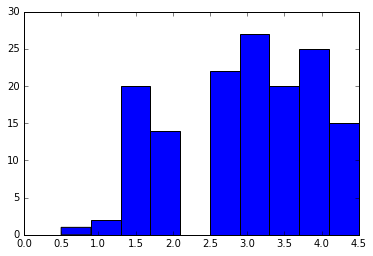

In [4]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.hist(movies["Metacritic_norm_round"])

(array([ 12.,   0.,  27.,   0.,   0.,  41.,   0.,  55.,   0.,  11.]),
 array([ 3. ,  3.2,  3.4,  3.6,  3.8,  4. ,  4.2,  4.4,  4.6,  4.8,  5. ]),
 <a list of 10 Patch objects>)

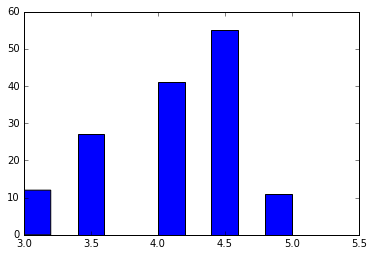

In [5]:
plt.hist(movies["Fandango_Stars"])

Inferences??

In [6]:
mean_f = movies["Fandango_Stars"].mean()
mean_m = movies["Metacritic_norm_round"].mean()

In [8]:
med_f = movies["Fandango_Stars"].median()
med_m = movies["Metacritic_norm_round"].median()

In [9]:
std_f = movies["Fandango_Stars"].std()
std_m = movies["Metacritic_norm_round"].std()

Review methodology differences...??

Further inferences...??

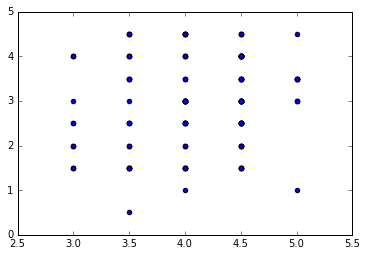

In [10]:
plt.scatter(movies["Fandango_Stars"],movies["Metacritic_norm_round"])

In [20]:
movies["fm_diff"] = (movies.Metacritic_norm_round - movies.Fandango_Stars).abs()

In [23]:
movies.sort_values(by = ["fm_diff"], ascending = False, inplace = True)
movies.head()

,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Fandango_Stars,Fandango_Ratingvalue,RT_norm,RT_user_norm,...,RT_norm_round,RT_user_norm_round,Metacritic_norm_round,Metacritic_user_norm_round,IMDB_norm_round,Metacritic_user_vote_count,IMDB_user_vote_count,Fandango_votes,Fandango_Difference,fm_diff
3,Do You Believe? (2015),18,84,22,4.7,5.4,5.0,4.5,0.90,4.20,...,1.0,4.0,1.0,2.5,2.5,31,3136,1793,0.5,4.0
47,Annie (2014),27,61,33,4.8,5.2,4.5,4.2,1.35,3.05,...,1.5,3.0,1.5,2.5,2.5,108,19222,6835,0.3,3.0
19,Pixels (2015),17,54,27,5.3,5.6,4.5,4.1,0.85,2.70,...,1.0,2.5,1.5,2.5,3.0,246,19521,3886,0.4,3.0
134,The Longest Ride (2015),31,73,33,4.8,7.2,4.5,4.5,1.55,3.65,...,1.5,3.5,1.5,2.5,3.5,49,25214,2603,0.0,3.0
133,Paul Blart: Mall Cop 2 (2015),5,36,13,2.4,4.3,3.5,3.5,0.25,1.80,...,0.5,2.0,0.5,1.0,2.0,211,15004,3054,0.0,3.0


In [27]:
import scipy.stats
r, p = scipy.stats.pearsonr(movies["Fandango_Stars"], movies["Metacritic_norm_round"])

Inferences wrt r-value??

In [29]:
m, c, r, p, se = scipy.stats.linregress(movies["Metacritic_norm_round"],movies["Fandango_Stars"])

In [31]:
pred_3 = 3*m + c
pred_3

4.0917071528212041

In [33]:
pred_1 = m+c
pred_1

3.897084996873347

In [34]:
pred_5 = 5*m + c
pred_5

4.2863293087690604

(1, 5)

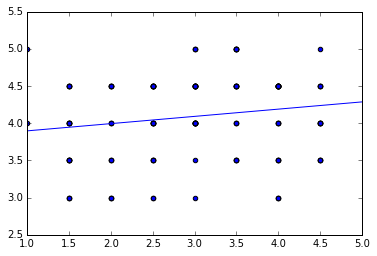

In [37]:
plt.scatter(movies["Metacritic_norm_round"],movies["Fandango_Stars"])
plt.plot([1,3,5],[pred_1, pred_3, pred_5])
plt.xlim(1,5)

Further work....